In [7]:
import pandas as pd
import matplotlib.pyplot as plt


#from sklearn.model_selection import train_test_split 
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB

In [2]:
data=pd.read_csv("./deteccion_spam/datos/enronSpamSubset.csv")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [16]:
#Función para visualizar la distribución de las clases (para ver si hay desbalanceo)
def distribucion(data):
    #Calculo la cantidad de correos electrónicos en cada clase
    class_distribution = data['Label'].value_counts()

    # Visualizar la distribución de las clases
    plt.figure(figsize=(8, 6))
    class_distribution.plot(kind='bar', color= ['#FF5733', 'blue'])
    plt.title('Distribución de Clases (Spam=1, Ham=0)')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad de Correos Electrónicos')
    plt.xticks(rotation=0)
    plt.show()

    print(class_distribution)

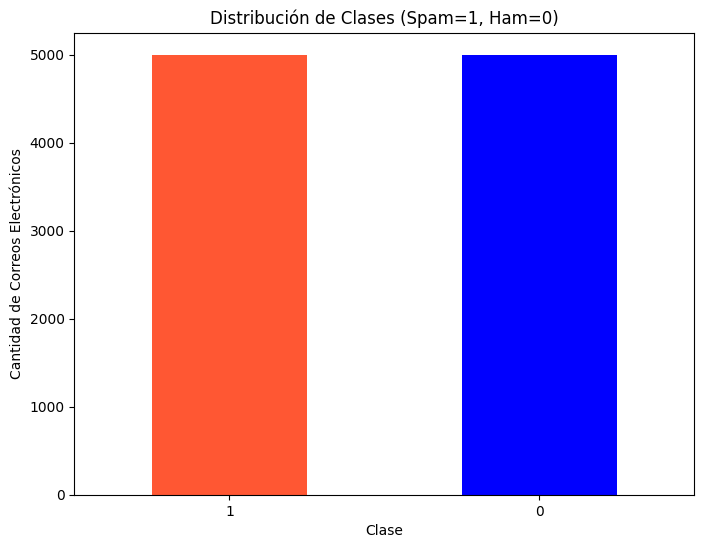

Label
1    5000
0    5000
Name: count, dtype: int64


In [17]:
distribucion(data)

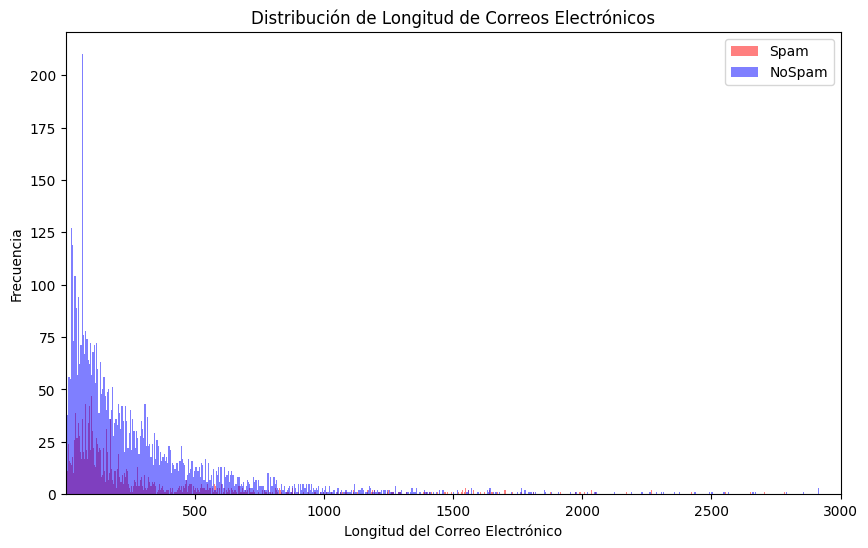

In [58]:
# Calcular la longitud de los correos electrónicos
#data['Email_Length'] = data['Body'].apply(len)  # Longitud en caracteres
data['Email_Length'] = data['Body'].apply(lambda x: len(x.split()))  # Longitud en palabras

# Separar los datos por clase
spam_emails = data[data['Label'] == 1]
nonspam_emails = data[data['Label'] == 0]

# Establecer los límites del eje x para enfocarse en la parte relevante de la distribución
x_min = data['Email_Length'].min()
x_max = data['Email_Length'].max()


# Visualizar la distribución de la longitud de los correos electrónicos por clase
plt.figure(figsize=(10, 6))
plt.hist(spam_emails['Email_Length'], bins=5000, color='red', alpha=0.5, label='Spam')
plt.hist(nonspam_emails['Email_Length'], bins=5000, color='blue', alpha=0.5, label='NoSpam')
plt.title('Distribución de Longitud de Correos Electrónicos')
plt.xlabel('Longitud del Correo Electrónico')
plt.ylabel('Frecuencia')
plt.legend()
#plt.grid(True)
plt.xlim(x_min, 3000)
plt.show()

### Selección de características